# University Trail

### Importing required libraries

In [1]:
# Importing required libraries
import pandas as pd 
import numpy as np
import os
import glob # Imported to return all file paths that match a specific pattern.
import warnings # Imported to ignore occuring warnings 
import gc # Garbage Collection
import seaborn as sns # Plotting
from sklearn.model_selection import train_test_split # Split the dataset as explored and unexplored data.
import matplotlib.pyplot as plt # Plotting
from numpy.random import seed, randn 
from statsmodels.graphics.gofplots import qqplot # Normality check
warnings.filterwarnings('ignore')

###  Loading the dataset

In [2]:
# Loading the data using glob module (function used to search for files that match a specific file pattern or name).
data = pd.DataFrame()
folders = glob.glob(os.path.join("C:/Users/pc/Desktop/Data Science A2/HEMANTH/Stress-Predict-Dataset-main/Raw_data/*"))

# Looping into 35 volunteers data (folders) and loading their test results dataset
for i in range(len(folders)):
    files = []
    files.append(glob.glob(folders[i] + '/*.csv'))
    files = sum(files,[])
    
    #Reading Acc
    a = pd.read_csv(files[0])
    a['Time(sec)'] = int(float(a.columns[0])) + a.index
    a.rename({a.columns[0]:'Acc_x',a.columns[1]:'Acc_y',a.columns[2]:'Acc_z'},axis = 1,inplace = True)
    
    #Reading Bvp
    b = pd.read_csv(files[1])
    b['Time(sec)'] = int(float(b.columns[0])) + b.index
    b.rename({b.columns[0]:'Bvp'},axis = 1,inplace = True)
    
    #Reading Eda
    c = pd.read_csv(files[2])
    c['Time(sec)'] = int(float(c.columns[0])) + c.index
    c.rename({c.columns[0]:'Eda'},axis = 1,inplace = True)
    
    #Reading HR
    d = pd.read_csv(files[3])
    d['Time(sec)'] = int(float(d.columns[0])) + d.index
    d.rename({d.columns[0]:'Hr'},axis = 1,inplace = True)
    
    #Reading IBI
    e = pd.read_csv(files[4])
    e['Time(sec)'] = int(float(e.columns[0])) + e.index
    e.rename({e.columns[0]:'Ibi_1',e.columns[1]:'Ibi_2'},axis = 1,inplace = True)
    
    #Reading Temp
    f = pd.read_csv(files[6])
    f['Time(sec)'] = int(float(f.columns[0])) + f.index
    f.rename({f.columns[0]:'Temp'},axis = 1,inplace = True)
    
    #Merhing all the csv based in Time(sec), outer becaause if we do inner we losr more than half values which have null
    new = a.merge(b,on = 'Time(sec)',how = 'outer').merge(c,on = 'Time(sec)',how = 'outer').merge(d,on = 'Time(sec)',how = 'outer').merge(e,on = 'Time(sec)',how = 'outer').merge(f,on = 'Time(sec)',how = 'outer')
    
    new.fillna(method = 'ffill',inplace = True)
    new.fillna(method = 'bfill',inplace = True)
    
    data = data.append(new)

In [3]:
import datetime

#Getting datetime attribute from UNIX timestamp
data['date'] = data['Time(sec)'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [4]:
data.head()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,date
0,32.0,32.0,32.0,1644226061,64.0,4.000000,1.0,35.484375,0.890625,4.00,2022-02-07 09:27:41
1,-2.0,43.0,43.0,1644226062,0.0,0.000000,1.0,36.343750,0.859375,28.39,2022-02-07 09:27:42
2,-2.0,44.0,46.0,1644226063,0.0,0.112750,1.0,37.296875,0.953125,28.39,2022-02-07 09:27:43
3,2.0,44.0,47.0,1644226064,0.0,0.166563,1.0,38.187500,0.890625,28.39,2022-02-07 09:27:44
4,3.0,43.0,44.0,1644226065,0.0,0.167844,1.0,39.046875,0.859375,28.39,2022-02-07 09:27:45


In [5]:
# Determine the shape of the DataFrame 
data.shape

(7428225, 11)

In [6]:
data.columns

Index(['Acc_x', 'Acc_y', 'Acc_z', 'Time(sec)', 'Bvp', 'Eda', 'Hr', 'Ibi_1',
       'Ibi_2', 'Temp', 'date'],
      dtype='object')

In [7]:
data.dtypes

Acc_x               float64
Acc_y               float64
Acc_z               float64
Time(sec)             int64
Bvp                 float64
Eda                 float64
Hr                  float64
Ibi_1               float64
Ibi_2               float64
Temp                float64
date         datetime64[ns]
dtype: object

In [8]:
# Obtain the summary statistics for numerical columns in our DataFrame.
data.describe()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp
count,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06
mean,-1.820556e+01,-8.556537e-01,4.588584e+01,1.645756e+09,2.438605e-03,5.542039e-01,7.663505e+01,3.183453e+03,8.422947e-01,3.038850e+01
std,2.940956e+01,1.743744e+01,2.238250e+01,8.438921e+05,7.165202e+01,6.932219e-01,1.330808e+01,2.599010e+02,1.752937e-01,2.633649e+00
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,1.644226e+09,-2.751640e+03,0.000000e+00,1.000000e+00,1.148438e+01,3.125000e-01,4.000000e+00
25%,-4.100000e+01,-7.000000e+00,3.600000e+01,1.644980e+09,-1.461000e+01,1.412130e-01,6.575000e+01,3.092406e+03,7.187500e-01,2.875000e+01
50%,-1.900000e+01,1.000000e+00,5.600000e+01,1.645646e+09,1.210000e+00,2.987990e-01,7.402000e+01,3.252688e+03,8.281250e-01,3.059000e+01
75%,1.000000e+00,8.000000e+00,6.100000e+01,1.646670e+09,1.546000e+01,7.333020e-01,8.582000e+01,3.313234e+03,9.531250e-01,3.167000e+01
max,1.270000e+02,1.270000e+02,1.270000e+02,1.647065e+09,2.102490e+03,1.100507e+01,1.467800e+02,3.542312e+03,1.703125e+00,3.639000e+01


In [9]:
# Check for null values.
data.isnull().sum()

Acc_x        0
Acc_y        0
Acc_z        0
Time(sec)    0
Bvp          0
Eda          0
Hr           0
Ibi_1        0
Ibi_2        0
Temp         0
date         0
dtype: int64

In [10]:
# Check for duplicate values.
data.duplicated().sum()

0

# Merging with preprocessed to get the Label

In [11]:
#Processed data to get the Labe;
processed = pd.read_csv(r"C:\Users\pc\Desktop\Data Science A2\HEMANTH\Stress-Predict-Dataset-main\Processed_data\Improved_All_Combined_hr_rsp_binary.csv")

In [12]:
processed.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [13]:
#Merging based on Time(sec) to get the label
data = data.merge(processed[['Time(sec)','Label']],on = 'Time(sec)',how = 'inner')

In [14]:
data.head()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,date,Label
0,-17.0,17.0,59.0,1644227583,-12.38,0.231907,69.52,2856.468750,1.21875,28.47,2022-02-07 09:53:03,0
1,-12.0,10.0,69.0,1644227583,-0.00,0.667881,1.00,684.953125,0.81250,34.79,2022-02-07 09:53:03,0
2,-16.0,17.0,59.0,1644227584,-7.21,0.233188,68.98,2856.468750,1.21875,28.47,2022-02-07 09:53:04,0
3,-9.0,11.0,72.0,1644227584,-0.00,0.660192,1.00,718.156250,0.71875,34.79,2022-02-07 09:53:04,0
4,-16.0,17.0,59.0,1644227585,-1.68,0.233188,68.42,2856.468750,1.21875,28.47,2022-02-07 09:53:05,0


# Checking balance of data for 0 and 1 ratio

In [15]:
#count of imbalanced data
data['Label'].value_counts()

0    345509
1    163517
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

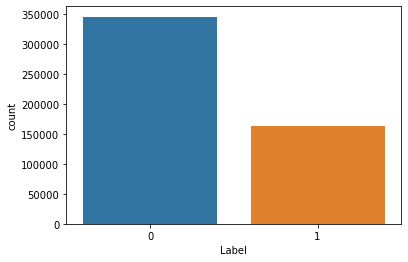

In [16]:
#Seaborn visulization of imbalanced data
sns.countplot(data['Label'])

# Resampling to handle the imbalanced data

In [17]:
#manual Balance of data by random choice of majority class to match the minority class

class0 = np.where(data['Label'] == 0)[0]
class1 =np.where(data['Label'] == 1)[0]

#downsampled index of random choice for 0 from dataset
class0_downsampled = np.random.choice(class0, size=class1.shape[0], replace=False)

#All index of balanced 1 and 0
resampled_index = np.hstack((class1 ,class0_downsampled))

In [18]:
data = data.iloc[resampled_index]

In [19]:
data.reset_index(inplace = True,drop = True)

In [20]:
data.head()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,date,Label
0,-15.0,16.0,59.0,1644228196,8.82,0.267782,75.18,2856.468750,1.218750,28.63,2022-02-07 10:03:16,1
1,-61.0,-19.0,-1.0,1644228196,39.46,0.266800,70.32,3448.484375,0.953125,35.66,2022-02-07 10:03:16,1
2,-16.0,17.0,59.0,1644228197,7.98,0.267782,75.10,2856.468750,1.218750,28.63,2022-02-07 10:03:17,1
3,-61.0,-20.0,-2.0,1644228197,42.95,0.265518,70.35,3448.484375,0.953125,35.66,2022-02-07 10:03:17,1
4,-15.0,17.0,60.0,1644228198,7.43,0.267782,75.03,2856.468750,1.218750,28.65,2022-02-07 10:03:18,1


In [21]:
data['Label'].value_counts()

1    163517
0    163517
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

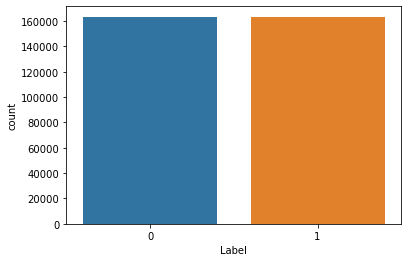

In [22]:
#Countplot after balancing the data
sns.countplot(data['Label'])

array([[<AxesSubplot:title={'center':'Acc_x'}>,
        <AxesSubplot:title={'center':'Acc_y'}>,
        <AxesSubplot:title={'center':'Acc_z'}>],
       [<AxesSubplot:title={'center':'Time(sec)'}>,
        <AxesSubplot:title={'center':'Bvp'}>,
        <AxesSubplot:title={'center':'Eda'}>],
       [<AxesSubplot:title={'center':'Hr'}>,
        <AxesSubplot:title={'center':'Ibi_1'}>,
        <AxesSubplot:title={'center':'Ibi_2'}>],
       [<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'Label'}>]], dtype=object)

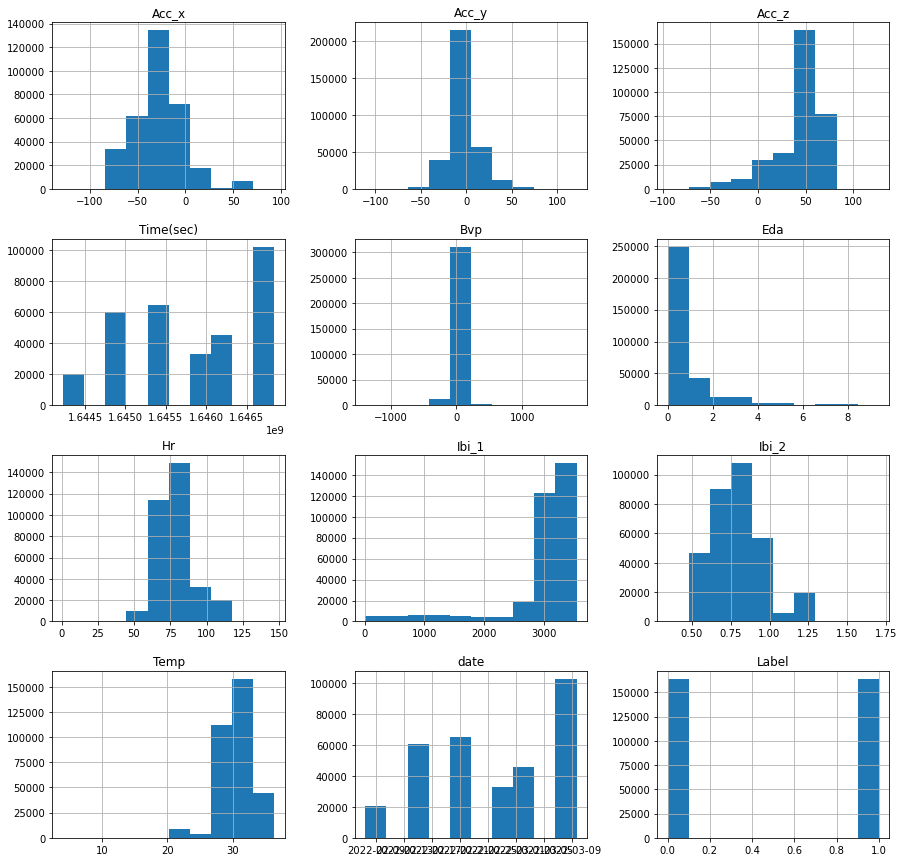

In [23]:
#checking if the data is skewed or not
data.hist(figsize = (15,15))

# Time series representation of the data exploration

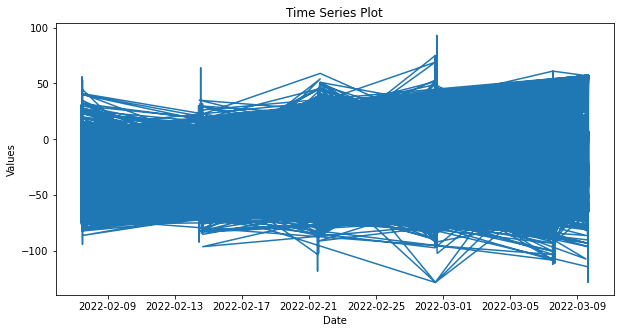

In [24]:
# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.date, data['Acc_x'])

# Set plot title and axis labels
ax.set_title('Time Series Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Values')

# Show plot
plt.show()

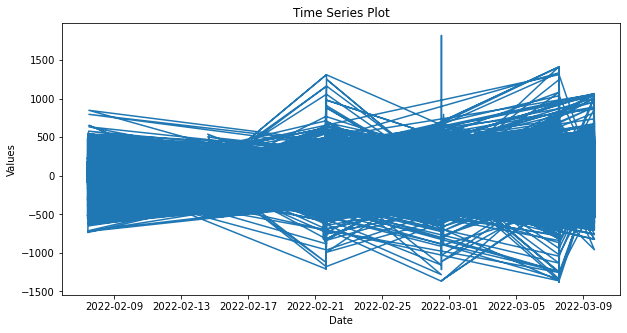

In [25]:
# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.date, data['Bvp'])

# Set plot title and axis labels
ax.set_title('Time Series Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Values')

# Show plot
plt.show()

### Split  subset of data separate from the exploration to avoid overfitting.

In [26]:
# Split data by taking 20% as test data and 80% for further exploration.
explore_data, unexplore_data = train_test_split(data, test_size=0.2, random_state=25)

### Create and assign values into the target column  

In [30]:
# Obtain the summary statistics for numerical columns in explore_data DataFrame.
explore_data.describe()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,Label
count,261627.000000,261627.000000,261627.000000,2.616270e+05,261627.000000,261627.000000,261627.000000,261627.000000,261627.000000,261627.000000,261627.000000
mean,-27.915154,-2.895791,43.795938,1.645817e+09,-0.005221,0.769076,78.866308,2972.451239,0.811248,30.433959,0.499688
std,23.911173,15.257623,24.819808,8.062531e+05,74.020615,1.159553,13.785276,676.945605,0.165520,2.749680,0.500001
min,-128.000000,-111.000000,-95.000000,1.644228e+09,-1382.970000,0.000000,1.000000,11.843750,0.343750,4.000000,0.000000
25%,-46.000000,-11.000000,36.000000,1.645436e+09,-14.380000,0.166623,68.830000,3011.609375,0.703125,28.590000,0.000000
50%,-28.000000,-3.000000,55.000000,1.646052e+09,1.210000,0.296005,76.080000,3176.156250,0.796875,30.530000,0.000000
75%,-15.000000,4.000000,60.000000,1.646660e+09,15.960000,0.892142,86.050000,3299.843750,0.875000,32.150000,1.000000
max,93.000000,121.000000,127.000000,1.646842e+09,1822.090000,9.366458,146.780000,3542.312499,1.703125,36.390000,1.000000


# 
If the points in the plot roughly fall along a straight diagonal line, then the data is assumed to be normally distributed.
However, the points on this plot clearly don’t fall along the red line, so we would not assume that this dataset is normally distributed.

### Find the correlation of each column in a DataFrame.

In [31]:
#checking the correlation of all attribute to dependent variable
explore_data.corr()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,Label
Acc_x,1.000000,0.209402,0.505147,0.037999,-0.003249,-0.071357,0.235419,-0.026621,-0.120111,-0.318988,0.006210
Acc_y,0.209402,1.000000,-0.038104,0.034341,0.003259,0.047915,0.007320,-0.114285,-0.102977,-0.230059,-0.019791
Acc_z,0.505147,-0.038104,1.000000,-0.064406,-0.008929,0.016306,0.001701,-0.008286,0.061042,-0.012480,0.016355
Time(sec),0.037999,0.034341,-0.064406,1.000000,0.001271,-0.274457,0.019671,0.077614,-0.183420,-0.199242,0.007915
Bvp,-0.003249,0.003259,-0.008929,0.001271,1.000000,0.001736,-0.001256,-0.004384,-0.001435,-0.002987,-0.002059
Eda,-0.071357,0.047915,0.016306,-0.274457,0.001736,1.000000,0.069327,0.047323,0.046585,0.116853,0.007411
Hr,0.235419,0.007320,0.001701,0.019671,-0.001256,0.069327,1.000000,-0.014356,-0.504762,-0.382413,0.025427
Ibi_1,-0.026621,-0.114285,-0.008286,0.077614,-0.004384,0.047323,-0.014356,1.000000,0.086921,-0.037070,0.025815
Ibi_2,-0.120111,-0.102977,0.061042,-0.183420,-0.001435,0.046585,-0.504762,0.086921,1.000000,0.338833,-0.009102
Temp,-0.318988,-0.230059,-0.012480,-0.199242,-0.002987,0.116853,-0.382413,-0.037070,0.338833,1.000000,-0.005993


# 
From the above correlation table, determining stress is highly correlated with acc_x,acc_y, acc_z, bvp and hr.
It shows that acceleration of motion of body along x axis, y axis and z axis along with Blood volume pressure and Heart-rate are the major factors of stress.

<AxesSubplot:>

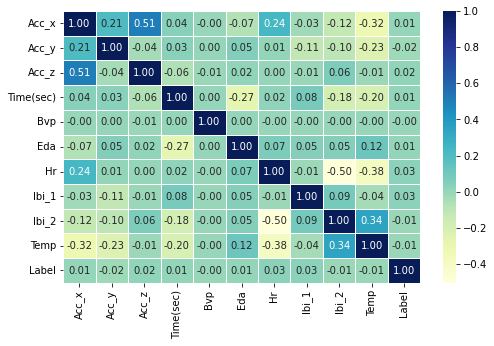

In [32]:
# Plotting the heatmap for correlation
corr_matrix = explore_data.corr()
plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, annot = True, linewidth = 0.5, fmt = ".2f", cmap = "YlGnBu")

# Model Building

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])

RandomForestClassifier(max_depth=2, random_state=0)

In [39]:
rdf_pred = rdf.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [40]:
from sklearn.metrics import classification_report

print(classification_report(unexplore_data['Label'], rdf_pred))

              precision    recall  f1-score   support

           0       0.73      0.13      0.22     32622
           1       0.52      0.95      0.68     32785

    accuracy                           0.54     65407
   macro avg       0.63      0.54      0.45     65407
weighted avg       0.63      0.54      0.45     65407



In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(unexplore_data['Label'], rdf_pred)
cm

array([[ 4279, 28343],
       [ 1560, 31225]], dtype=int64)

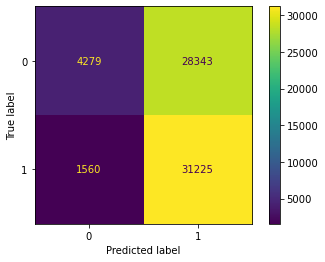

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])
lr_pred = lr.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [49]:
print(classification_report(unexplore_data['Label'], lr_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     32622
           1       0.00      0.00      0.00     32785

    accuracy                           0.50     65407
   macro avg       0.25      0.50      0.33     65407
weighted avg       0.25      0.50      0.33     65407



In [50]:
cm = confusion_matrix(unexplore_data['Label'], lr_pred)
cm

array([[32622,     0],
       [32785,     0]], dtype=int64)

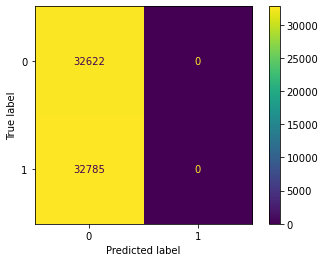

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

# Naive bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])

gnb_pred = gnb.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [53]:
print(classification_report(unexplore_data['Label'], gnb_pred))

              precision    recall  f1-score   support

           0       0.50      0.13      0.21     32622
           1       0.50      0.87      0.64     32785

    accuracy                           0.50     65407
   macro avg       0.50      0.50      0.42     65407
weighted avg       0.50      0.50      0.42     65407



In [54]:
cm = confusion_matrix(unexplore_data['Label'], gnb_pred)
cm

array([[ 4325, 28297],
       [ 4294, 28491]], dtype=int64)

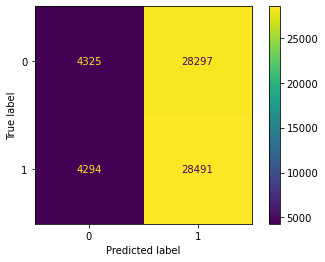

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

# Ada Boost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=10, random_state=0)
ada.fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])

ada_pred = ada.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [58]:
print(classification_report(unexplore_data['Label'], ada_pred))

              precision    recall  f1-score   support

           0       0.87      0.11      0.19     32622
           1       0.53      0.98      0.69     32785

    accuracy                           0.55     65407
   macro avg       0.70      0.55      0.44     65407
weighted avg       0.70      0.55      0.44     65407



In [59]:
cm = confusion_matrix(unexplore_data['Label'], ada_pred)
cm

array([[ 3563, 29059],
       [  534, 32251]], dtype=int64)

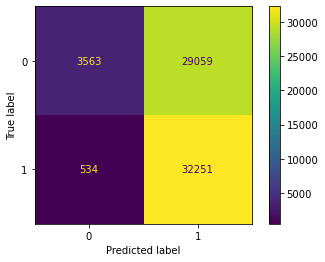

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()